In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
dataset = pd.read_csv('NSE-TATAGLOBAL11.csv')  
dataset.head()
dataset.reset_index()
dataset




,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [7]:
dataset.describe().head(5)










,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000


In [14]:
x=dataset.iloc[:,1:2]
y=dataset.iloc[:,-3]
print("INDEPENDENT VALUES:")
print(x)


INDEPENDENT VALUES:
        Open
0     208.00
1     217.00
2     223.50
3     230.00
4     234.55
...      ...
1230  160.85
1231  161.15
1232  156.00
1233  155.70
1234  157.00

[1235 rows x 1 columns]


In [13]:
print("DEPENDANT VALUE:")
print(y)

DEPENDANT VALUE:
0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("training data",X_train)
print("testing data",X_test)
print("training data y",y_train)
print("testing data y",y_test)


training data         Open
983   156.05
927   149.90
365   147.90
1000  160.70
952   164.90
...      ...
720   124.90
940   148.50
463   116.00
1154  141.35
1130  143.50

[988 rows x 1 columns]
testing data         Open
10    235.00
26    237.00
893   153.40
614   120.85
227   235.00
...      ...
1075  150.00
309   159.00
665   124.10
594   121.00
991   159.10

[247 rows x 1 columns]
training data y 983     152.35
927     153.70
365     150.20
1000    161.60
952     163.25
         ...  
720     128.80
940     147.40
463     118.50
1154    141.00
1130    143.30
Name: Close, Length: 988, dtype: float64
testing data y 10      234.60
26      233.35
893     156.05
614     120.00
227     225.00
         ...  
1075    149.10
309     166.55
665     126.50
594     120.35
991     159.35
Name: Close, Length: 247, dtype: float64


In [17]:
print(regressor.intercept_)
print(regressor.coef_)


-0.0300390620581652
[0.99899667]


In [18]:
y_pred = regressor.predict(X_test)


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(15)  


,Actual,Predicted
10,234.60,234.734178
26,233.35,236.732171
893,156.05,153.216050
614,120.00,120.698708
227,225.00,234.734178
1224,158.75,161.907321
556,133.10,133.835514
1165,149.05,152.067203
841,147.95,147.571718
611,120.25,118.850564


In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))


Mean Squared Error: 10.786283749768566
Root Mean Squared Error: 3.2842478210038544
r_2 statistic: 0.99


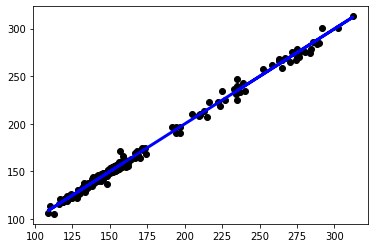

In [23]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
